## In this notebook, we are going to study some probability distribution functions (pdfs) and if have time, do some monte carlo simulations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from tabulate import tabulate



In [2]:
df1 = pd.read_csv('/home/amir/Documents/GitHub/Statistics-Analysis-/pdf/5516539/Wind_Time_Series_Dataset/Wind Time Series Dataset(10min).csv')

In [3]:
df1

,Time,WindSpeed,Power
0,2014-10-07 01:20:00,8.22,40.526173
1,2014-10-07 01:30:00,8.09,38.552540
2,2014-10-07 01:50:00,7.21,21.313683
3,2014-10-07 02:00:00,6.75,18.031418
4,2014-10-07 02:10:00,6.52,16.593281
...,...,...,...
39190,2015-10-06 23:10:00,7.45,30.580953
39191,2015-10-06 23:20:00,7.15,28.455153
39192,2015-10-06 23:30:00,7.27,30.080422
39193,2015-10-06 23:40:00,8.19,42.483618


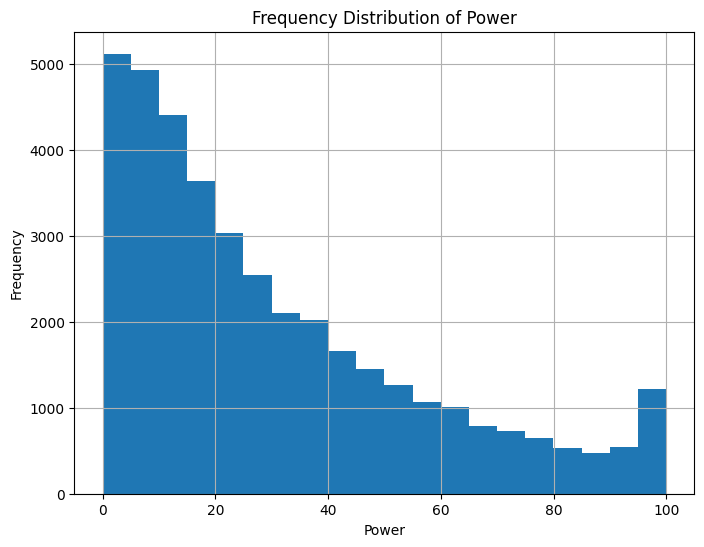

In [4]:
# Plot frequency distribution with bins
plt.figure(figsize=(8, 6))
df1['Power'].hist(bins=20)  # Adjust the number of bins as needed
plt.title('Frequency Distribution of Power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()